In [1]:
from pandas.core.common import flatten
import numpy as np
import random 
def centraliseWeights(weights):
    sample = weights
    for w in range(len(sample)):
        meanValue = sum(sample[w])/len(sample[w])
        stdDeviation = np.std(sample[w])
        for k in range(len(sample[w])):
            print(sample[w][k] , end = "")
            sample[w][k] = random.uniform(meanValue - stdDeviation , meanValue + stdDeviation)
            print(sample[w][k], weights[w][k])
    return sample

def weightMeanValues(weights):
    newWeights = list(flatten(weights))
    MeanValue = sum(newWeights)/len(newWeights)
    stdDeviation = np.std(newWeights)
    return MeanValue , stdDeviation

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from pandas.core.common import flatten
import random

model = keras.models.load_model('mnist_model.h5')

# constant_value = 2.0

# for layer in model.layers:
layer = model.layers[-2]
# print(layer)
# if isinstance(layer, keras.layers.Dense) and len(layer.weights) == 2:
original_weights = layer.get_weights()
# MeanValue , stdDeviation = weightMeanValues(original_weights)
# print(   "Original Weights :  " , original_weights)
new_Weights = centraliseWeights(original_weights[0])
final_Weights = []
final_Weights.append(new_Weights)
final_Weights.append(original_weights[1])
# print(new_Weights[0][0] , original_weights[0][0][0])
print(model.summary())
layer.set_weights(final_Weights)

model.save('NewOptimizedModel.h5')


0.12110843-0.06901316 -0.06901316
-0.108514340.016911328 0.016911328
0.0432796370.031912588 0.031912588
-0.0674140750.14110944 0.14110944
-0.040321450.01653245 0.01653245
-0.049221136-0.048566267 -0.048566267
0.0002531826-0.040669303 -0.040669303
0.13579914-0.007896169 -0.007896169
-0.035036340.027297022 0.027297022
0.0198861040.0151896225 0.0151896225
0.069387010.10024207 0.10024207
0.119556760.025259271 0.025259271
-0.112545940.07503495 0.07503495
-0.024687892-0.084357 -0.084357
-0.092409780.05277619 0.05277619
-0.111108820.061315022 0.061315022
0.251409980.12200192 0.12200192
0.17501214-0.10900634 -0.10900634
0.200229880.03987916 0.03987916
-0.213074090.12794982 0.12794982
-0.0450999440.0646797 0.0646797
0.18986098-0.021927755 -0.021927755
0.11047901-0.016449543 -0.016449543
0.017991578-0.054296806 -0.054296806
-0.0216007740.10167533 0.10167533
-0.034508430.053780008 0.053780008
-0.160533760.12065614 0.12065614
-0.20743309-0.031505495 -0.031505495
0.14696883-0.013095894 -0.013095894

In [23]:
# accuracies = [0.9215, 0.9193, 0.9162, 0.9121, 0.9080, 0.9040, 0.8999, 0.8958, 0.8917, 0.8876, 0.8835, 0.8794, 0.8753, 0.8712, 0.8671, 0.8630, 0.7589]
accuracies = [0.1589, 0.1599, 0.1940, 0.2230, 0.2260, 0.2970, 0.3342, 0.3423, 0.3722, 0.3999, 0.4245, 0.4278, 0.7899, 0.8956, 0.9123, 0.9193, 0.9215]
accuracies1 = [0.1089, 0.1299, 0.1340, 0.2230, 0.3060]


In [3]:
(_, _), (x_test, y_test) = keras.datasets.mnist.load_data()
x_test = x_test / 255.0

model = keras.models.load_model('mnist_model.h5')

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

accuracy = np.mean(predicted_labels == y_test)

print("Accuracy:", accuracy)

313/313 [==============================] - 2s 6ms/step
Accuracy: 0.9913


In [4]:
(_, _), (x_test, y_test) = keras.datasets.mnist.load_data()
x_test = x_test / 255.0

model = keras.models.load_model('NewOptimizedModel.h5')

predictions = model.predict(x_test)

predicted_labels = np.argmax(predictions, axis=1)
accuracy = np.mean(predicted_labels == y_test)

print("Accuracy:", accuracy)

313/313 [==============================] - 2s 6ms/step
Accuracy: 0.0787


<BarContainer object of 2 artists>

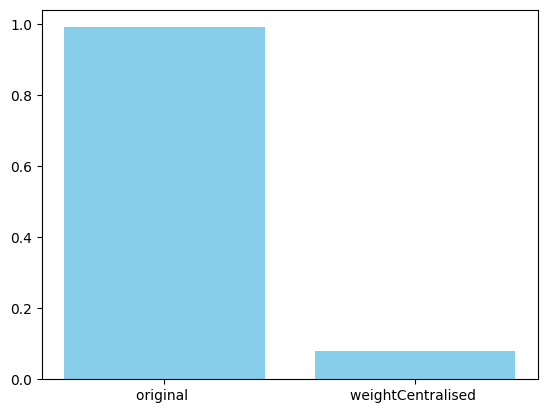

In [11]:
from matplotlib import pyplot as plt
plt.bar(['original ' , 'weightCentralised '], [0.9913 , 0.0787], color=['skyblue', 'skyblue'])

<BarContainer object of 17 artists>

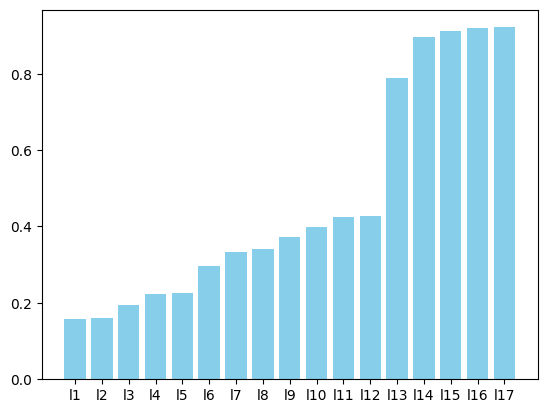

In [20]:
from matplotlib import pyplot as plt
plt.bar(['l1' , 'l2' , 'l3' , 'l4' , 'l5' , 'l6' , 'l7' , 'l8' , 'l9' , 'l10' , 'l11' , 'l12' , 'l13' , 'l14' , 'l15' ,'l16' , 'l17'] , accuracies, color=['skyblue', 'skyblue'])

<BarContainer object of 5 artists>

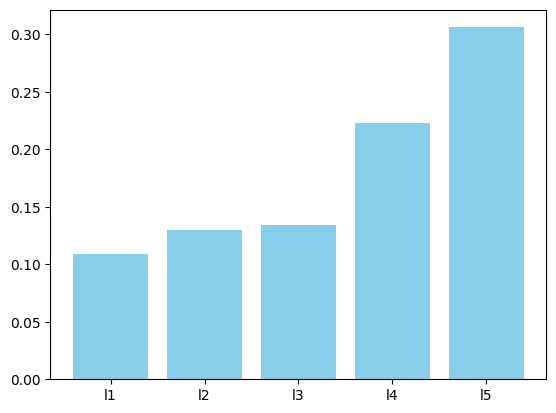

In [24]:
from matplotlib import pyplot as plt
plt.bar(['l1' , 'l2' , 'l3' , 'l4' , 'l5'] , accuracies1, color=['skyblue', 'skyblue'])